### task 1: Preparing Data

In [1]:
################# Data description and pre-processing #################
############################ loading data ############################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
education = pd.read_csv("Test3.csv")

In [3]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TOWN11CD                                  1098 non-null   object 
 1   TOWN11NM                                  1098 non-null   object 
 2   POPULATION_2011                           1098 non-null   int64  
 3   SIZE_FLAG                                 1098 non-null   object 
 4   RGN11NM                                   1098 non-null   object 
 5   COASTAL                                   1098 non-null   object 
 6   COASTAL DETAILED                          1098 non-null   object 
 7   TTWA11CD                                  1098 non-null   object 
 8   TTWA11NM                                  1098 non-null   object 
 9   TTWA CLASSIFICATION                       1098 non-null   object 
 10  JOB DENSITY FLAG                    

### task 2:Data Visualization

### task 3: Relationship between values

In [5]:
use_col = [
    "Education Score",
    "Income Deprivation Percentile",
    "Knowledge Intensive Financial Services",
    "Other Knowledge Intensive Services",
    "Knowledge Intensive Market Services",
    "High Technology Services",
    "Less Knowledge Intensive Market Services",
    "High Technology Manufacturing",
    "Medium Technology Manufacturing",
    "Low Technology Manufacturing",
    "Non-manufacturing Production",
]
education.loc[:, use_col]

,Education Score,Income Deprivation Percentile,Knowledge Intensive Financial Services,Other Knowledge Intensive Services,Knowledge Intensive Market Services,High Technology Services,Less Knowledge Intensive Market Services,High Technology Manufacturing,Medium Technology Manufacturing,Low Technology Manufacturing,Non-manufacturing Production
0,-0.5,24.0,NaN,0.62,0.40,0.18,1.00,NaN,3.13,NaN,NaN
1,2.0,55.0,0.26,1.64,1.59,0.28,0.64,NaN,0.13,0.59,0.47
2,-1.0,81.0,0.50,0.98,0.70,1.55,1.11,8.17,1.12,0.46,0.84
3,-1.2,83.0,0.20,1.31,0.38,0.24,1.15,0.00,0.99,0.62,NaN
4,-1.2,37.0,0.09,1.03,0.67,0.39,1.16,NaN,0.45,1.20,0.25
...,...,...,...,...,...,...,...,...,...,...,...
1093,1.6,75.0,0.14,0.89,2.26,0.23,0.98,NaN,0.68,0.52,0.19
1094,1.3,51.0,0.77,0.71,1.38,0.50,0.88,NaN,0.37,0.76,1.54
1095,0.3,42.0,1.84,0.88,1.21,1.50,1.07,0.46,0.71,0.73,0.30
1096,-0.3,34.0,0.48,0.55,1.02,0.75,1.15,2.77,3.51,1.27,0.16


In [6]:
testing = education.loc[:, use_col]
testing.dropna(inplace=True)

In [7]:
testing.isnull().sum()

Education Score                             0
Income Deprivation Percentile               0
Knowledge Intensive Financial Services      0
Other Knowledge Intensive Services          0
Knowledge Intensive Market Services         0
High Technology Services                    0
Less Knowledge Intensive Market Services    0
High Technology Manufacturing               0
Medium Technology Manufacturing             0
Low Technology Manufacturing                0
Non-manufacturing Production                0
dtype: int64

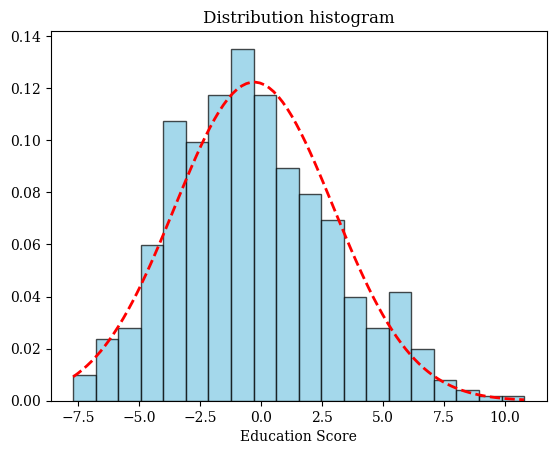

In [13]:
from matplotlib import rcParams

# 设置全局字体为 Times New Roman
rcParams["font.family"] = "serif"

data = testing["Education Score"]

plt.style.use("fast")

# 绘制直方图
plt.hist(data, bins=20, density=True, alpha=0.7, color="#7EC8E3", edgecolor="black")

mu, sigma = np.mean(data), np.std(data)
x = np.linspace(min(data), max(data), 100)
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
plt.plot(x, y, color="red", linestyle="dashed", linewidth=2, zorder=1)


# 添加标签和标题
plt.xlabel("Education Score")
plt.title("Distribution histogram")

plt.savefig("distribution histogram1.png")
# 显示图形
plt.show()

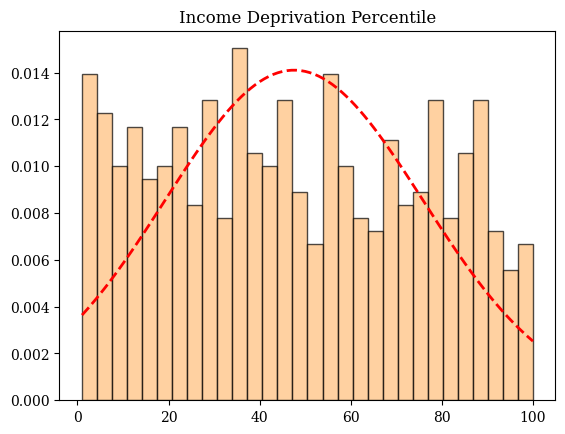

In [10]:
# 设置全局字体为 Times New Roman
rcParams["font.family"] = "serif"

data = testing["Income Deprivation Percentile"]

plt.style.use("fast")

# 绘制直方图
plt.hist(data, bins=30, density=True, alpha=0.7, color="#FFBE7A", edgecolor="black")
mu, sigma = np.mean(data), np.std(data)
x = np.linspace(min(data), max(data), 100)
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
plt.plot(x, y, color="red", linestyle="dashed", linewidth=2, zorder=1)

# 添加标签和标题
plt.title("Income Deprivation Percentile")

plt.savefig("distribution histogram.png")
# 显示图形
plt.show()

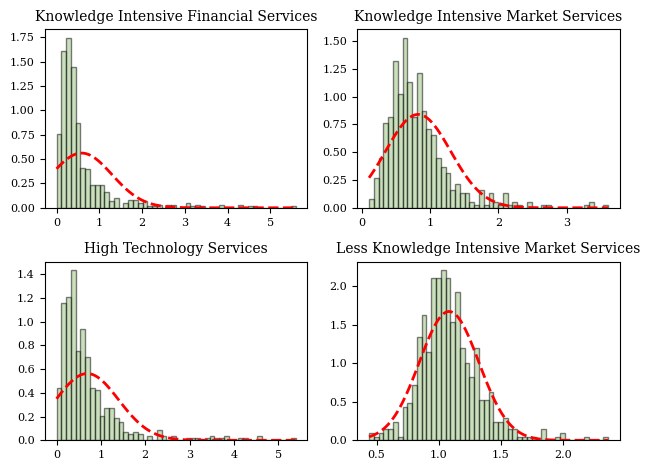

In [9]:
Test1 = [
    "Knowledge Intensive Financial Services",
    "Knowledge Intensive Market Services",
    "High Technology Services",
    "Less Knowledge Intensive Market Services",
]

fig, axes = plt.subplots(2, 2)

for i, ax in enumerate(axes.flatten()):
    ax.hist(
        testing[Test1[i]],
        bins=50,
        density=True,
        alpha=0.5,
        color="#96C37D",
        edgecolor="black",
    )
    ax.set_title(Test1[i], fontsize=10)
    ax.tick_params(axis="x", labelsize=8)  # 调整 x 轴刻度大小
    ax.tick_params(axis="y", labelsize=8)  # 调整 y 轴刻度大小

    mu, sigma = np.mean(testing[Test1[i]]), np.std(testing[Test1[i]])
    x1 = np.linspace(min(testing[Test1[i]]), max(testing[Test1[i]]), 100)
    y1 = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - mu) / sigma) ** 2)
    ax.plot(x1, y1, color="red", linestyle="dashed", linewidth=2)

plt.tight_layout()

plt.show()

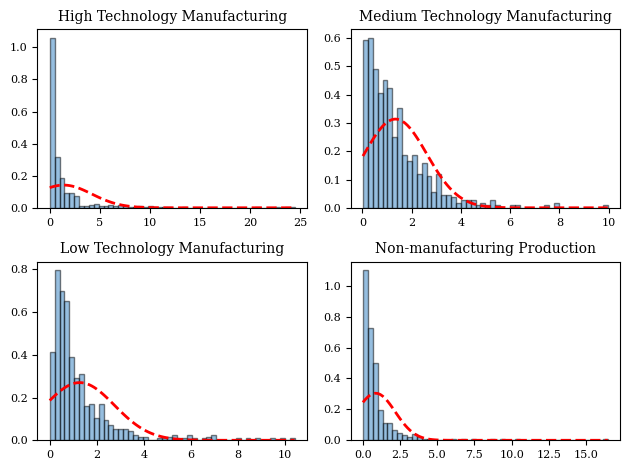

In [10]:
Test2 = [
    "High Technology Manufacturing",
    "Medium Technology Manufacturing",
    "Low Technology Manufacturing",
    "Non-manufacturing Production",
]

fig, axes = plt.subplots(2, 2)

for i, ax in enumerate(axes.flatten()):
    ax.hist(
        testing[Test2[i]],
        bins=50,
        density=True,
        alpha=0.5,
        color="#2F7FC1",
        edgecolor="black",
    )
    ax.set_title(Test2[i], fontsize=10)
    ax.tick_params(axis="x", labelsize=8)  # 调整 x 轴刻度大小
    ax.tick_params(axis="y", labelsize=8)  # 调整 y 轴刻度大小

    mu, sigma = np.mean(testing[Test2[i]]), np.std(testing[Test2[i]])
    x1 = np.linspace(min(testing[Test2[i]]), max(testing[Test2[i]]), 100)
    y1 = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - mu) / sigma) ** 2)
    ax.plot(x1, y1, color="red", linestyle="dashed", linewidth=2)

plt.tight_layout()

plt.show()

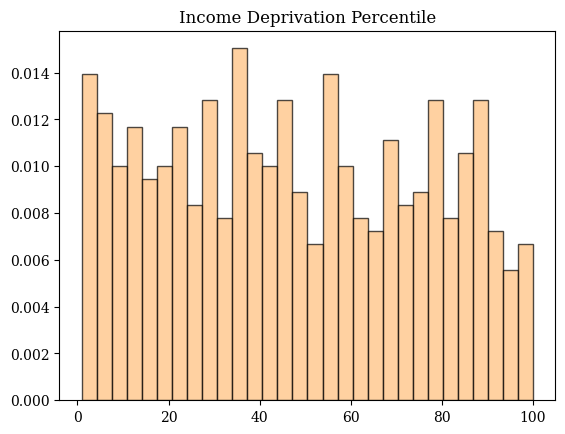

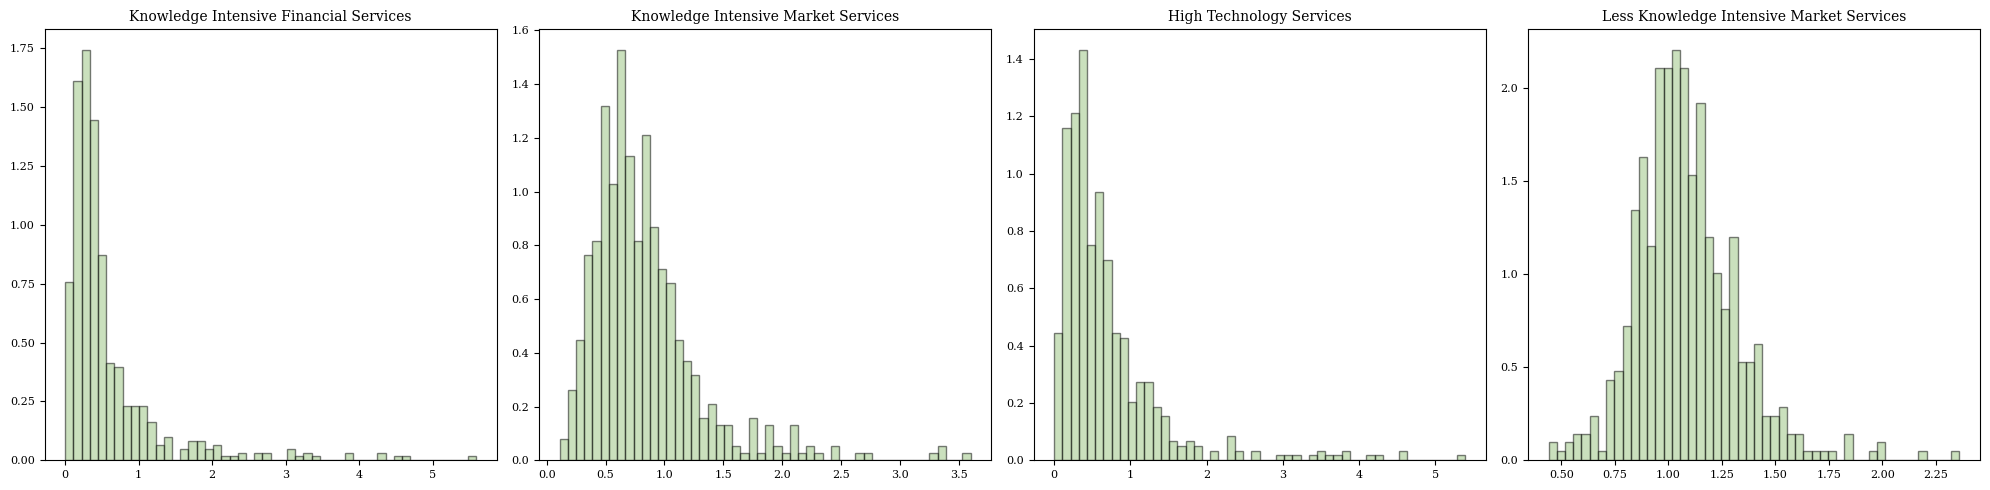

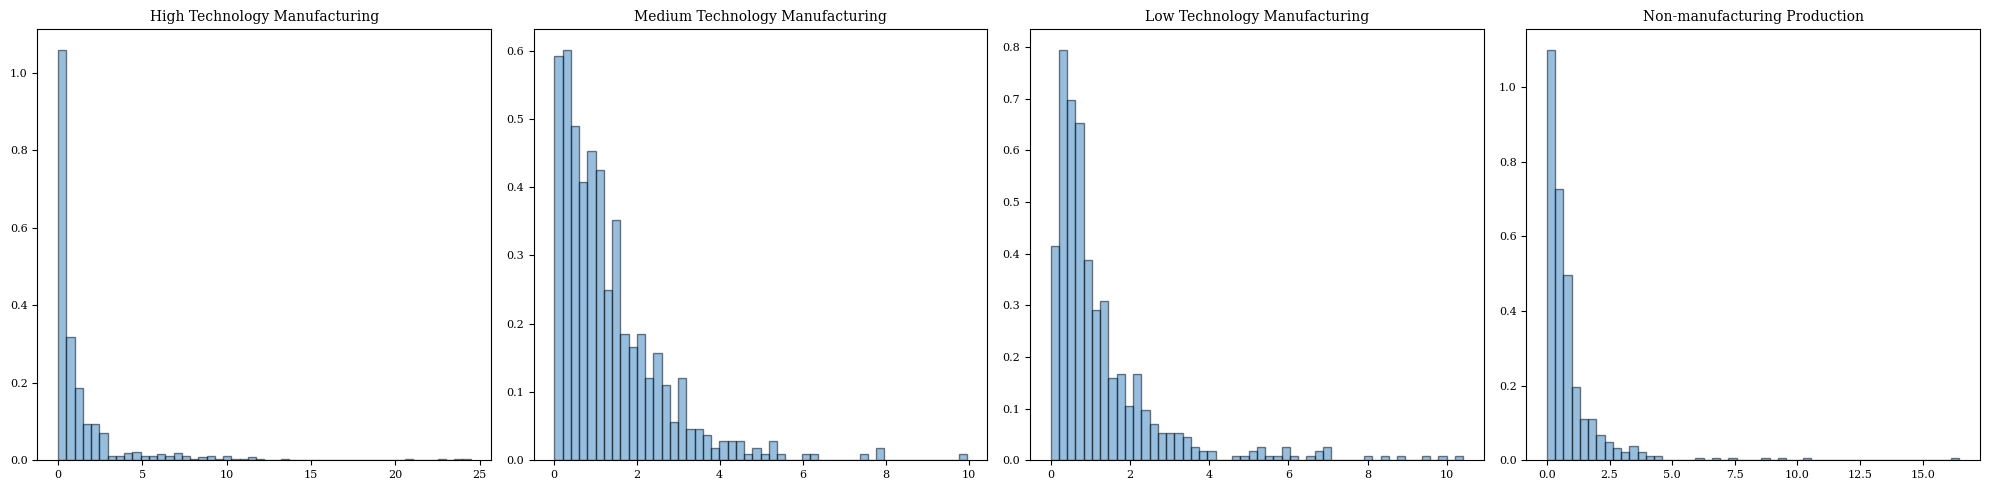

In [24]:
# 设置全局字体为 Times New Roman
rcParams["font.family"] = "serif"

data = testing["Income Deprivation Percentile"]

plt.style.use("fast")

# 绘制直方图
plt.hist(data, bins=30, density=True, alpha=0.7, color="#FFBE7A", edgecolor="black")
# 添加标签和标题
plt.title("Income Deprivation Percentile")

plt.savefig("hist1.png")
# 显示图形
plt.show()

Test1 = [
    "Knowledge Intensive Financial Services",
    "Knowledge Intensive Market Services",
    "High Technology Services",
    "Less Knowledge Intensive Market Services",
]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flatten()):
    ax.hist(
        testing[Test1[i]],
        bins=50,
        density=True,
        alpha=0.5,
        color="#96C37D",
        edgecolor="black",
    )
    ax.set_title(Test1[i], fontsize=10)
    ax.tick_params(axis="x", labelsize=8)  # 调整 x 轴刻度大小
    ax.tick_params(axis="y", labelsize=8)  # 调整 y 轴刻度大小

plt.tight_layout()
plt.savefig("hist2.png")
plt.show()

Test2 = [
    "High Technology Manufacturing",
    "Medium Technology Manufacturing",
    "Low Technology Manufacturing",
    "Non-manufacturing Production",
]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flatten()):
    ax.hist(
        testing[Test2[i]],
        bins=50,
        density=True,
        alpha=0.5,
        color="#2F7FC1",
        edgecolor="black",
    )
    ax.set_title(Test2[i], fontsize=10)
    ax.tick_params(axis="x", labelsize=8)  # 调整 x 轴刻度大小
    ax.tick_params(axis="y", labelsize=8)  # 调整 y 轴刻度大小
plt.tight_layout()
plt.savefig("hist3.png")
plt.show()

In [8]:
import seaborn as sns

colors = sns.color_palette("husl", 9)

In [20]:
testing.isna().sum()

Education Score                             0
Income Deprivation Percentile               0
Knowledge Intensive Financial Services      0
Other Knowledge Intensive Services          0
Knowledge Intensive Market Services         0
High Technology Services                    0
Less Knowledge Intensive Market Services    0
High Technology Manufacturing               0
Medium Technology Manufacturing             0
Low Technology Manufacturing                0
Non-manufacturing Production                0
dtype: int64

/tmp/ipykernel_127/3958200382.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(Test)


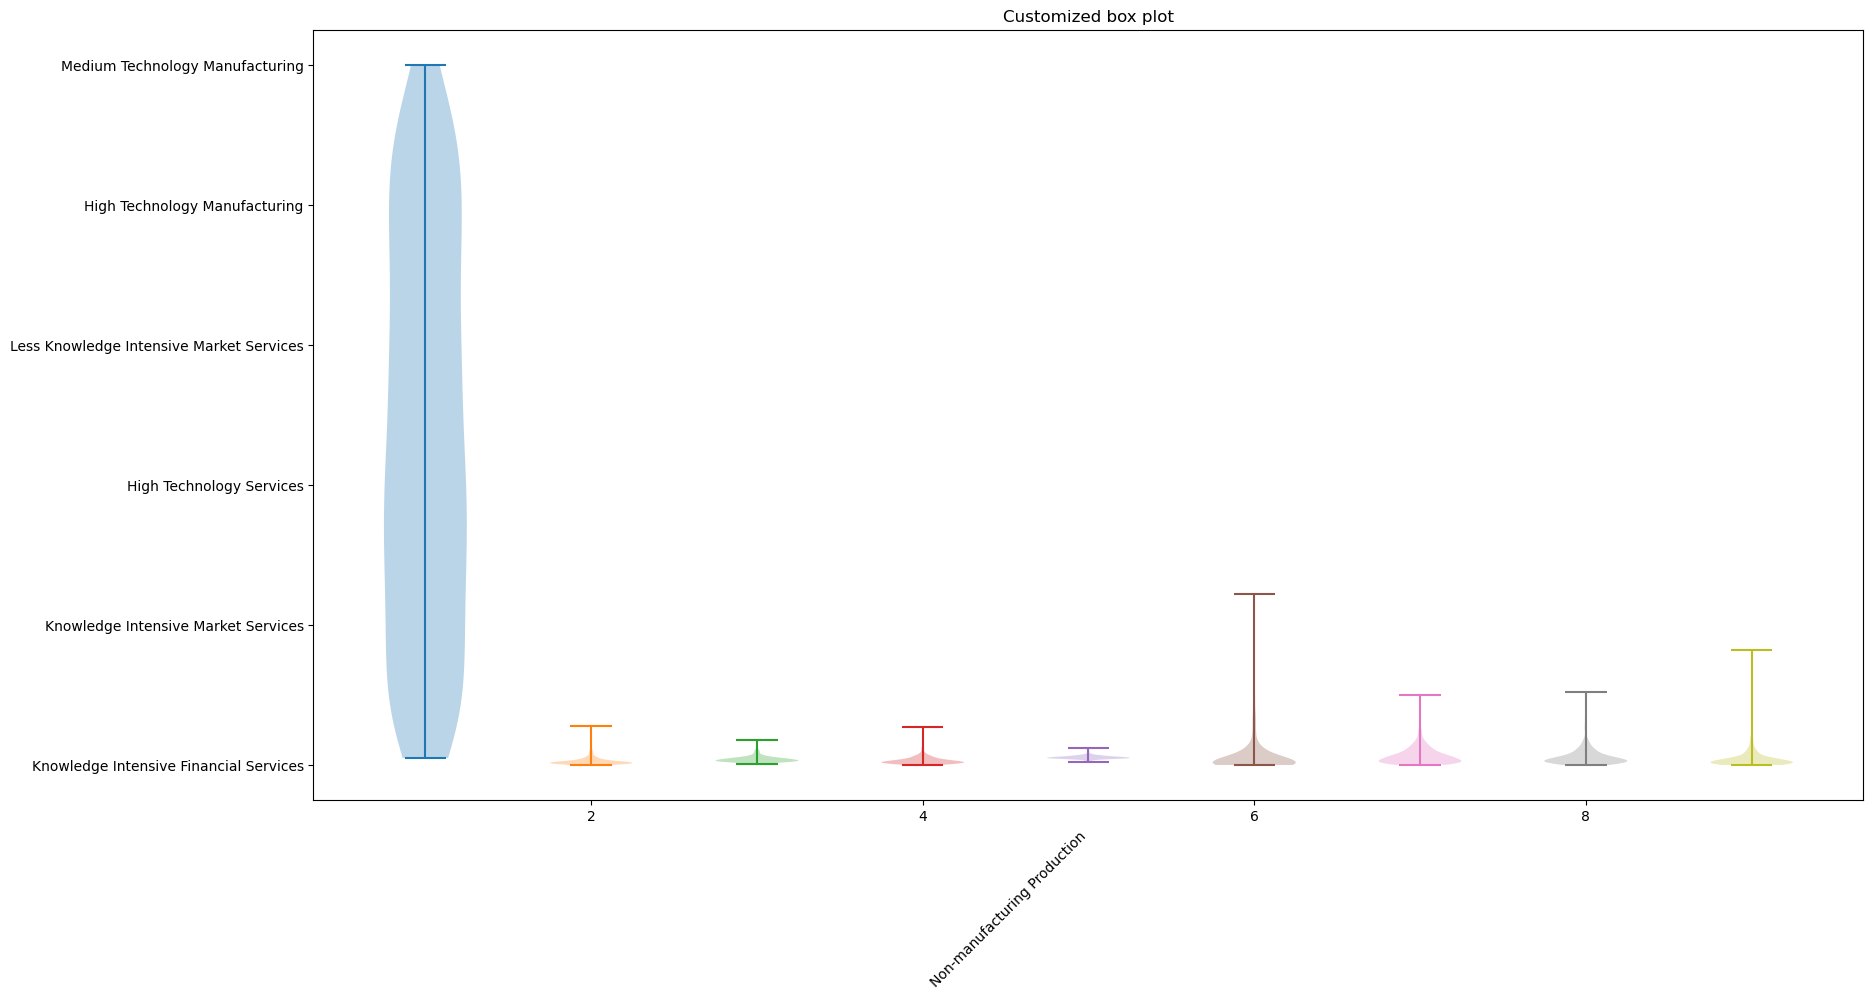

In [13]:
Test = ["Income Deprivation Percentile",
    "Knowledge Intensive Financial Services",
    "Knowledge Intensive Market Services",
    "High Technology Services",
    "Less Knowledge Intensive Market Services",
    "High Technology Manufacturing",
    "Medium Technology Manufacturing",
    "Low Technology Manufacturing",
    "Non-manufacturing Production",
]

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)


x_values = list(range(1, len(Test) + 1))
for i, column in enumerate(Test):
    ax.violinplot(dataset=testing[column], positions=[x_values[i]])
    ax.set_xlabel(Test[i], rotation=45, ha="right")

# x-axis labels
ax.set_yticklabels(Test)


# Adding title
plt.title("Customized box plot")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.savefig('violin.png')
# show plot
plt.show()

In [11]:
testing.describe()

,Education Score,Income Deprivation Percentile,Knowledge Intensive Financial Services,Other Knowledge Intensive Services,Knowledge Intensive Market Services,High Technology Services,Less Knowledge Intensive Market Services,High Technology Manufacturing,Medium Technology Manufacturing,Low Technology Manufacturing,Non-manufacturing Production
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,-0.277390,47.547794,0.585846,0.966562,0.826213,0.690864,1.082941,1.386691,1.341121,1.275331,0.860184
std,3.264551,28.309288,0.711718,0.318766,0.475735,0.709870,0.239205,2.822438,1.272778,1.480441,1.310756
min,-7.700000,1.000000,0.000000,0.260000,0.110000,0.000000,0.440000,0.000000,0.020000,0.000000,0.000000
25%,-2.625000,23.000000,0.210000,0.740000,0.520000,0.290000,0.930000,0.000000,0.440000,0.410000,0.200000
50%,-0.500000,46.000000,0.360000,0.930000,0.720000,0.480000,1.060000,0.440000,1.010000,0.790000,0.500000
75%,1.700000,72.000000,0.612500,1.180000,0.982500,0.835000,1.200000,1.360000,1.840000,1.520000,0.952500
max,10.800000,100.000000,5.590000,2.290000,3.600000,5.390000,2.360000,24.460000,9.960000,10.410000,16.460000


### 有Other列

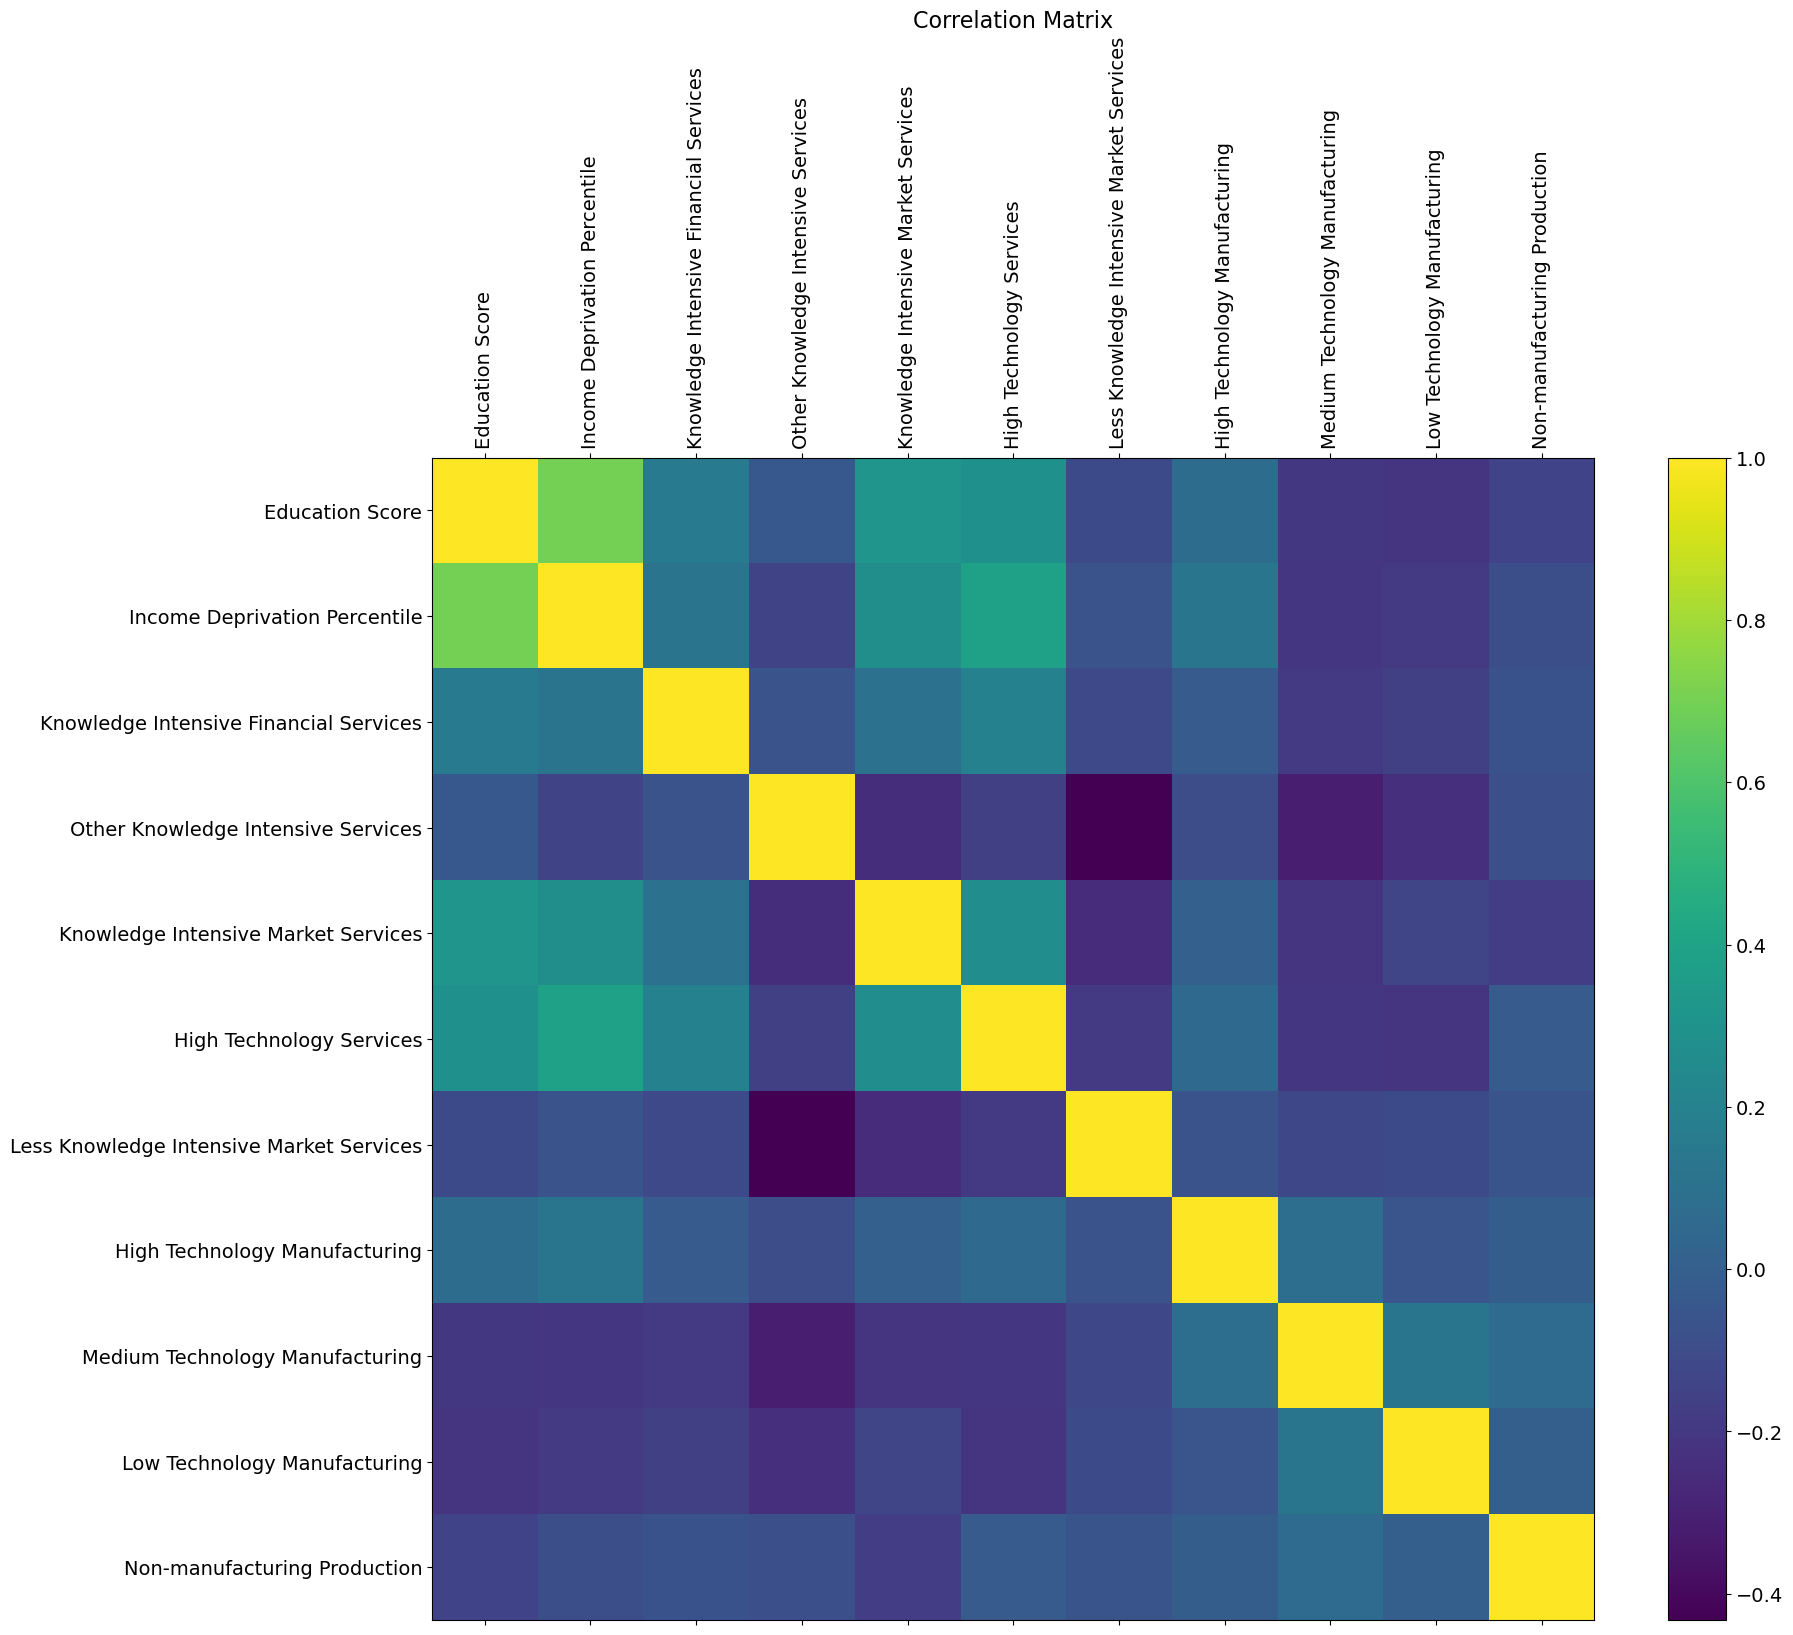

In [10]:
############# Checking the correlation between variables ##############
df = testing
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)  # 修改这里的 cmap 参数
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlation Matrix", fontsize=16)

plt.savefig("heatmap1.png")

### 无Other列

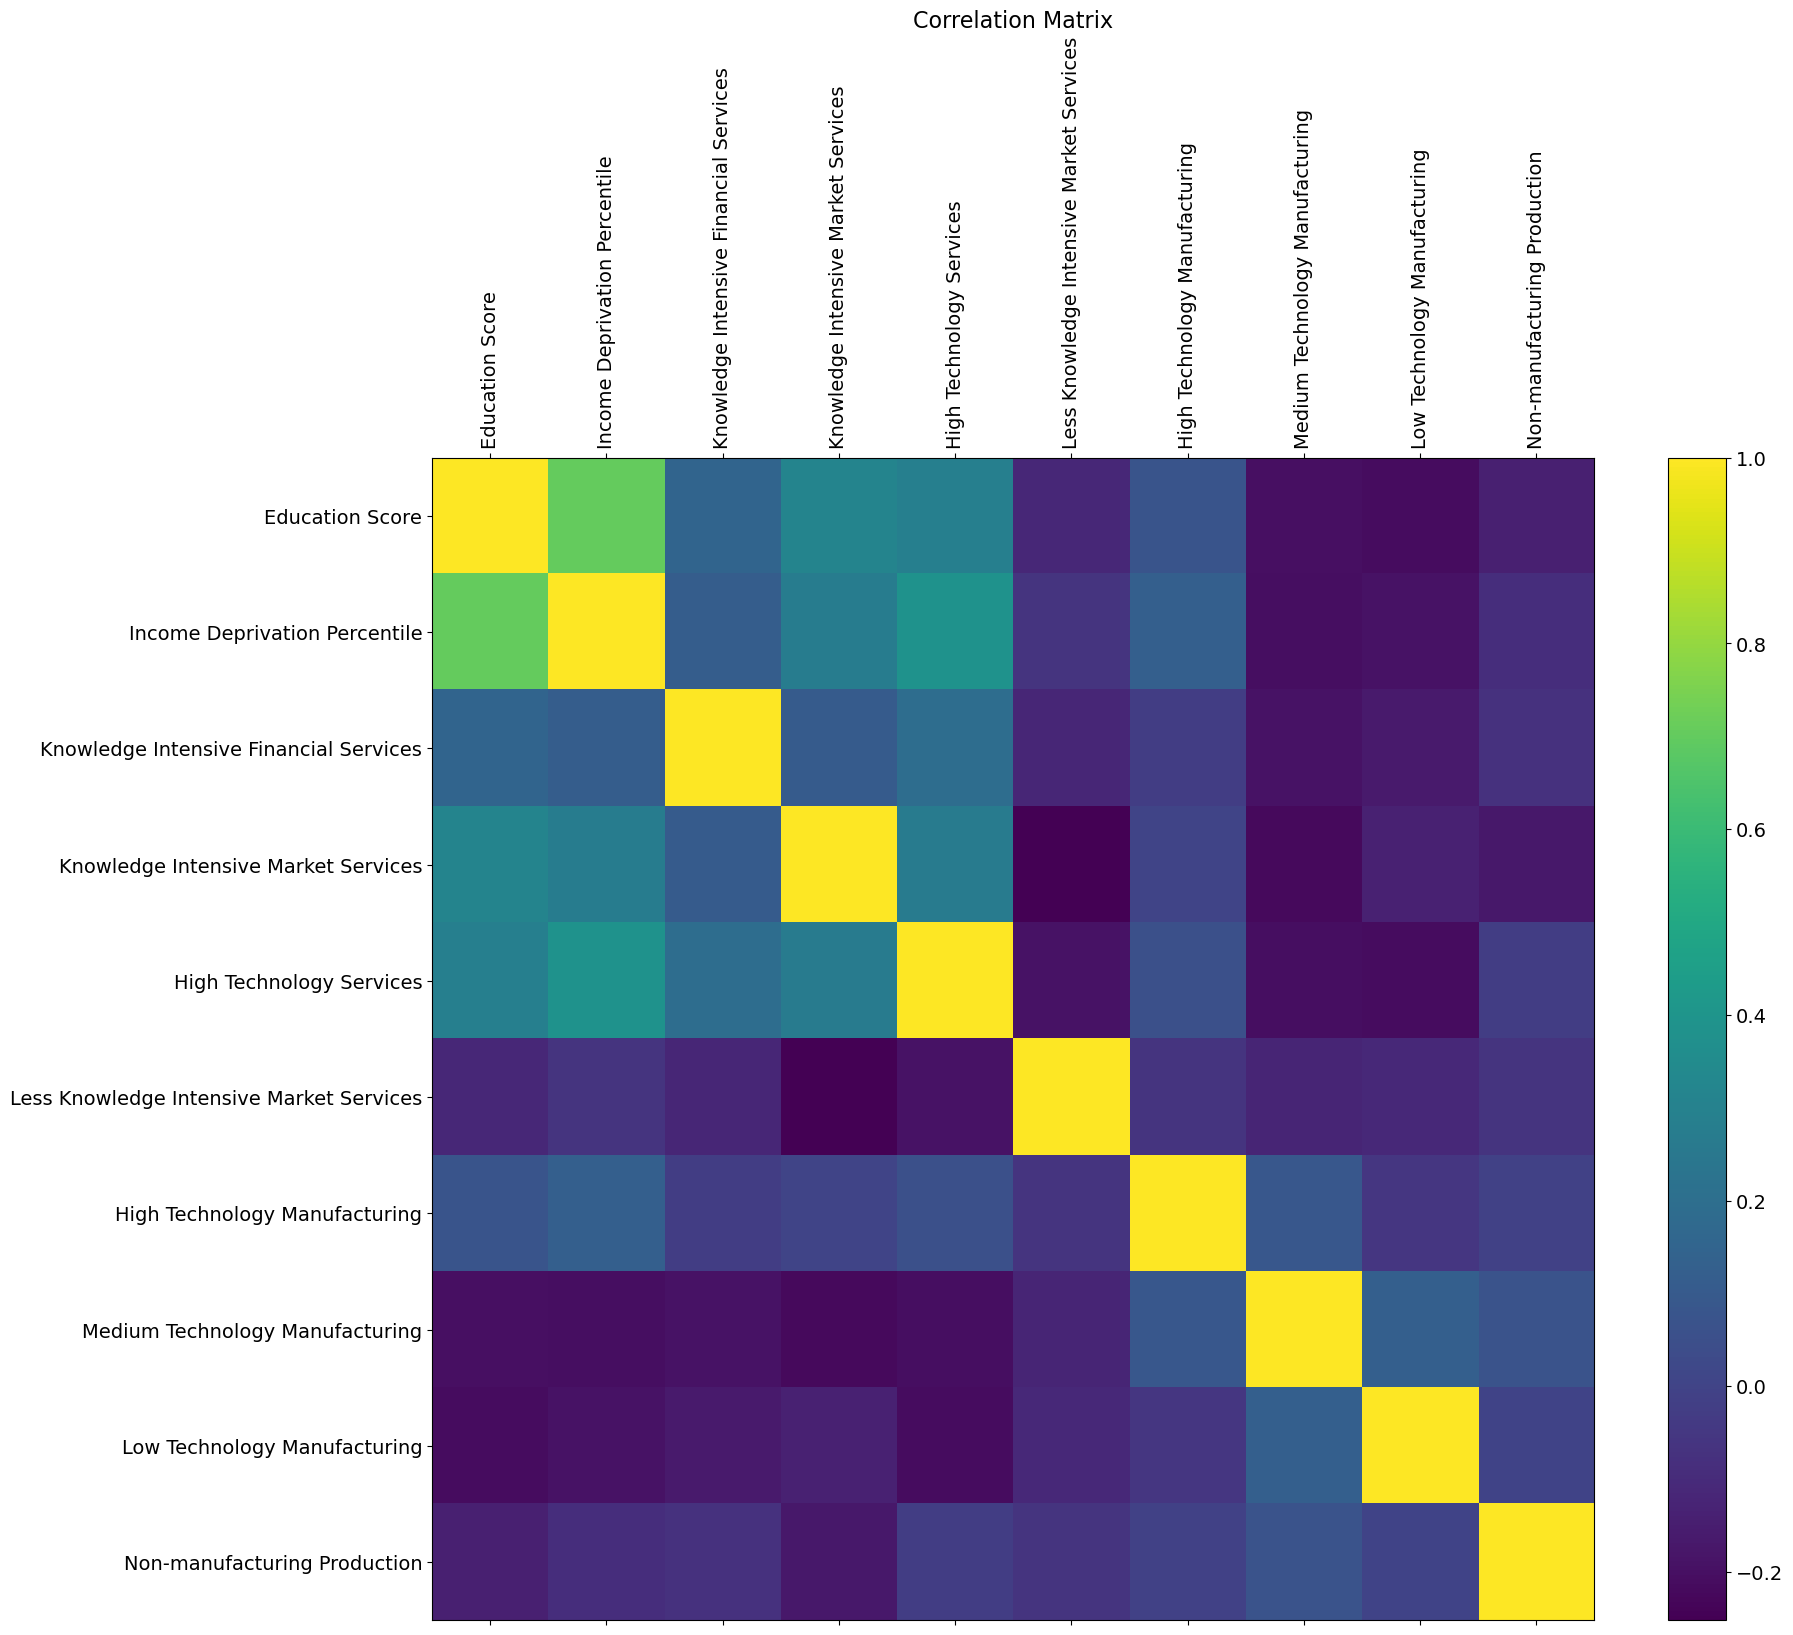

In [11]:
############# Checking the correlation between variables ##############
df = testing.drop(columns=["Other Knowledge Intensive Services"])
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)  # 修改这里的 cmap 参数
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlation Matrix", fontsize=16)

plt.savefig("heatmap2.png")

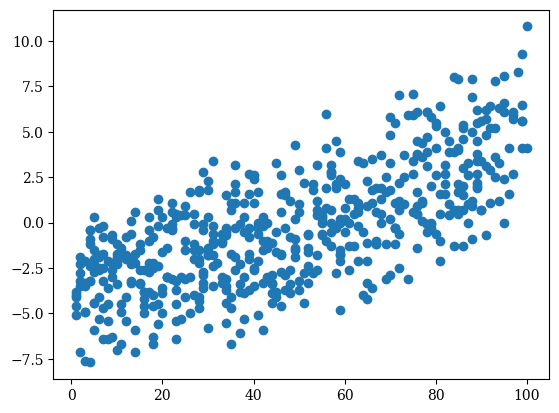

In [79]:
plt.scatter(testing["Income Deprivation Percentile"], testing["Education Score"])
plt.show()

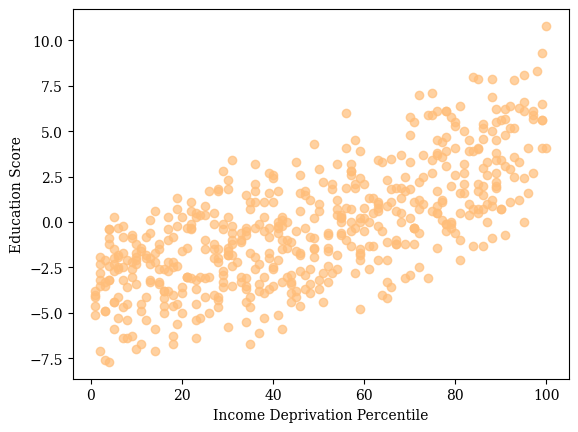

In [18]:
# 设置全局字体为 Times New Roman
data = testing["Income Deprivation Percentile"]

plt.style.use("fast")

# 绘制直方图
plt.scatter(
    testing["Income Deprivation Percentile"],
    testing["Education Score"],
    alpha=0.7,
    color="#FFBE7A",
)
# 添加标签和标题
plt.xlabel('Income Deprivation Percentile') 
plt.ylabel('Education Score') 

plt.show()

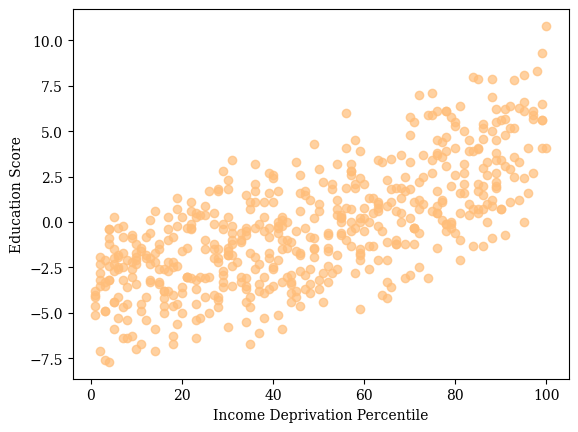

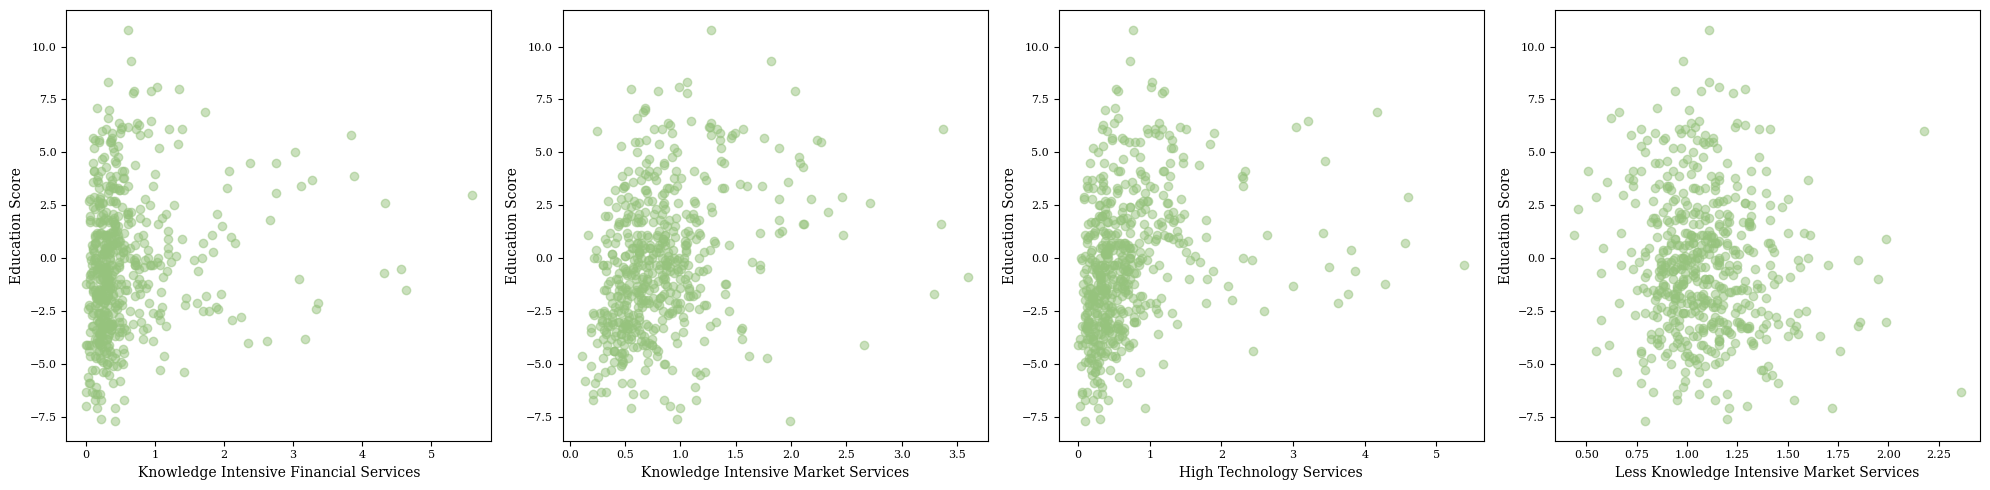

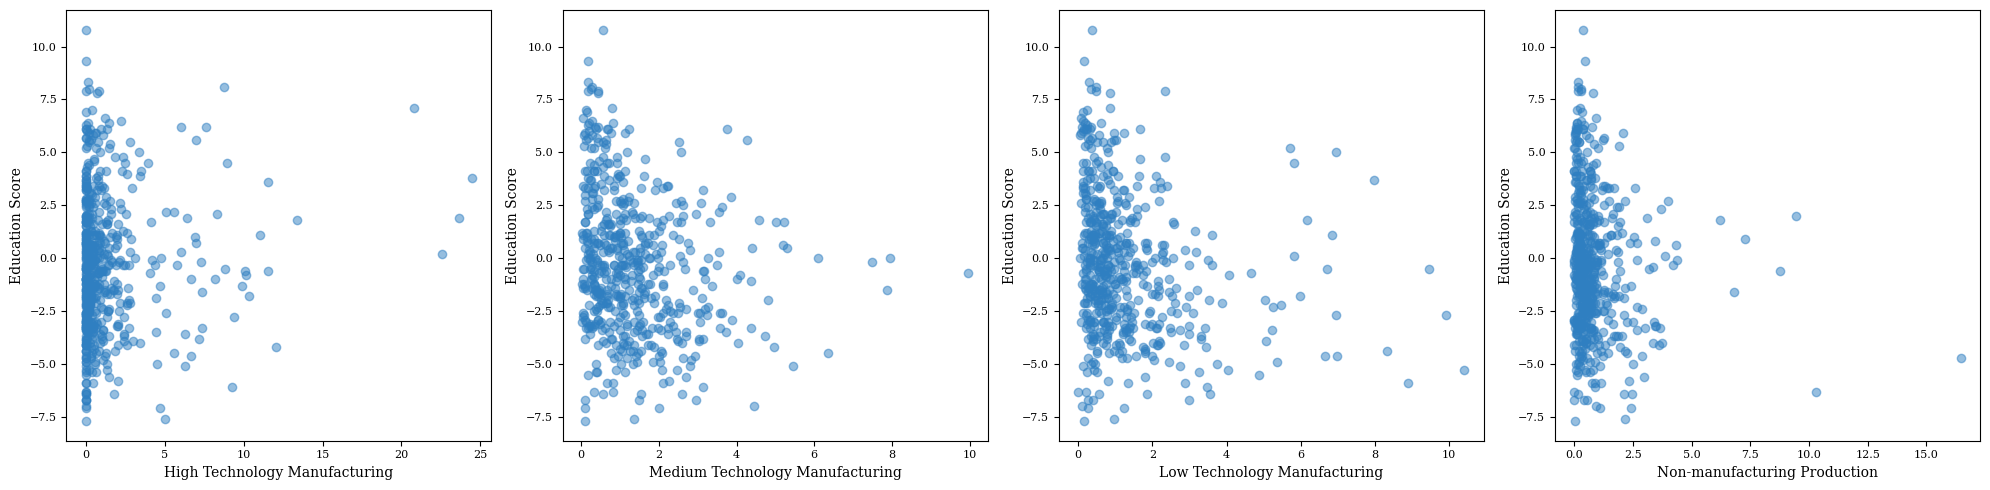

In [20]:
# 设置全局字体为 Times New Roman
rcParams["font.family"] = "serif"

data = testing["Income Deprivation Percentile"]

plt.style.use("fast")

# 绘制直方图
plt.scatter(
    testing["Income Deprivation Percentile"],
    testing["Education Score"],
    alpha=0.7,
    color="#FFBE7A",
)
# 添加标签和标题
plt.xlabel('Income Deprivation Percentile') 
plt.ylabel('Education Score') 

plt.savefig("scatter1.png")
# 显示图形
plt.show()

Test1 = [
    "Knowledge Intensive Financial Services",
    "Knowledge Intensive Market Services",
    "High Technology Services",
    "Less Knowledge Intensive Market Services",
]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flatten()):
    ax.scatter(
        testing[Test1[i]], testing["Education Score"], alpha=0.5, color="#96C37D"
    )
    ax.set_xlabel(Test1[i], fontsize=10)
    ax.set_ylabel('Education Score', fontsize=10)
    ax.tick_params(axis="x", labelsize=8)  # 调整 x 轴刻度大小
    ax.tick_params(axis="y", labelsize=8)  # 调整 y 轴刻度大小

plt.tight_layout()
plt.savefig("scatter2.png")

plt.show()

Test2 = [
    "High Technology Manufacturing",
    "Medium Technology Manufacturing",
    "Low Technology Manufacturing",
    "Non-manufacturing Production",
]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flatten()):
    ax.scatter(
        testing[Test2[i]], testing["Education Score"], alpha=0.5, color="#2F7FC1"
    )
    
    ax.set_xlabel(Test2[i], fontsize=10)
    ax.set_ylabel('Education Score', fontsize=10)
    ax.tick_params(axis="x", labelsize=8)  # 调整 x 轴刻度大小
    ax.tick_params(axis="y", labelsize=8)  # 调整 y 轴刻度大小
plt.tight_layout()
plt.savefig("scatter3.png")
plt.show()

### Task 4: Linear Regression

In [10]:
############################ calculating VIF #############################
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


def drop_column_using_vif_(df, thresh=5):
    """
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    """
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series(
            [
                variance_inflation_factor(df_with_const.values, i)
                for i in range(df_with_const.shape[1])
            ],
            name="VIF",
            index=df_with_const.columns,
        ).to_frame()

        # drop the const
        vif_df = vif_df.drop("const")

        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print("Dropping: {}".format(index_to_drop))
            df = df.drop(columns=index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df


# using VIF on the testing dataset
df_predictors_selected_VIF = drop_column_using_vif_(
    testing.drop("Education Score", axis=1)
)

Dropping: Other Knowledge Intensive Services


In [11]:
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['Income Deprivation Percentile',
       'Knowledge Intensive Financial Services',
       'Knowledge Intensive Market Services', 'High Technology Services',
       'Less Knowledge Intensive Market Services',
       'High Technology Manufacturing', 'Medium Technology Manufacturing',
       'Low Technology Manufacturing', 'Non-manufacturing Production'],
      dtype='object')


In [12]:
#################### building a linear regression model #####################
model_testing = sm.OLS(
    endog=testing[["Education Score"]], exog=sm.add_constant(df_predictors_selected_VIF)
).fit()

model_testing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Education Score   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     65.93
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           6.66e-81
Time:                        12:07:17   Log-Likelihood:                -1211.8
No. Observations:                 544   AIC:                             2444.
Df Residuals:                     534   BIC:                             2487.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8287      0.701     -4.036      0.000      -4.205      -1.452
Income Deprivation Percentile                0.0756      0.004     19.506      0.000       0.068       0.083
Knowledge Intensive Financial Services       0.1722      0.144      1.198      0.232      -0.110       0.455
Knowledge Intensive Market Services          0.6359      0.231      2.757      0.006       0.183       1.089
High Technology Services                    -0.1801      0.157     -1.147      0.252      -0.489       0.128
Less Knowledge Intensive Market Services    -0.9327      0.447     -2.085      0.038      -1.812      -0.054
High Technology Manufacturing               -0.0156      0.035     -0.444      0.657      -0.084       0.053
Medium Technology Manufacturing             -0.1041      0.083     -1.253      0.211      -0.267       0.059
Low Technology Manufacturing                -0.1798      0.070     -2.582      0.010      -0.317      -0.043
Non-manufacturing Production                -0.1681      0.076     -2.208      0.028      -0.318      -0.019
==============================================================================
Omnibus:                        8.337   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                5.411
Skew:                           0.071   Prob(JB):                       0.0668
Kurtosis:                       2.533   Cond. No.                         467.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
testing1 = testing[['Income Deprivation Percentile', 'Knowledge Intensive Market Services',
                    'Less Knowledge Intensive Market Services','Low Technology Manufacturing',
                   'Non-manufacturing Production','Education Score']]

In [14]:
testing1.describe()

,Income Deprivation Percentile,Knowledge Intensive Market Services,Less Knowledge Intensive Market Services,Low Technology Manufacturing,Non-manufacturing Production,Education Score
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,47.547794,0.826213,1.082941,1.275331,0.860184,-0.277390
std,28.309288,0.475735,0.239205,1.480441,1.310756,3.264551
min,1.000000,0.110000,0.440000,0.000000,0.000000,-7.700000
25%,23.000000,0.520000,0.930000,0.410000,0.200000,-2.625000
50%,46.000000,0.720000,1.060000,0.790000,0.500000,-0.500000
75%,72.000000,0.982500,1.200000,1.520000,0.952500,1.700000
max,100.000000,3.600000,2.360000,10.410000,16.460000,10.800000


In [15]:
############################ calculating VIF #############################
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


def drop_column_using_vif_(df, thresh=5):
    """
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    """
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series(
            [
                variance_inflation_factor(df_with_const.values, i)
                for i in range(df_with_const.shape[1])
            ],
            name="VIF",
            index=df_with_const.columns,
        ).to_frame()

        # drop the const
        vif_df = vif_df.drop("const")

        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print("Dropping: {}".format(index_to_drop))
            df = df.drop(columns=index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df


# using VIF on the testing dataset
df_predictors_selected_VIF = drop_column_using_vif_(
    testing1.drop("Education Score", axis=1)
)

In [16]:
#################### building a linear regression model #####################
model_testing = sm.OLS(
    endog=testing[["Education Score"]], exog=sm.add_constant(df_predictors_selected_VIF)
).fit()

model_testing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Education Score   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     117.6
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           6.75e-84
Time:                        12:07:34   Log-Likelihood:                -1214.2
No. Observations:                 544   AIC:                             2440.
Df Residuals:                     538   BIC:                             2466.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1416      0.609     -5.156      0.000      -4.338      -1.945
Income Deprivation Percentile                0.0750      0.004     20.668      0.000       0.068       0.082
Knowledge Intensive Market Services          0.6731      0.225      2.996      0.003       0.232       1.114
Less Knowledge Intensive Market Services    -0.8033      0.428     -1.877      0.061      -1.644       0.038
Low Technology Manufacturing                -0.1833      0.068     -2.694      0.007      -0.317      -0.050
Non-manufacturing Production                -0.1769      0.076     -2.328      0.020      -0.326      -0.028
==============================================================================
Omnibus:                        6.964   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                4.657
Skew:                           0.051   Prob(JB):                       0.0975
Kurtosis:                       2.558   Cond. No.                         417.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Task 5: Testing

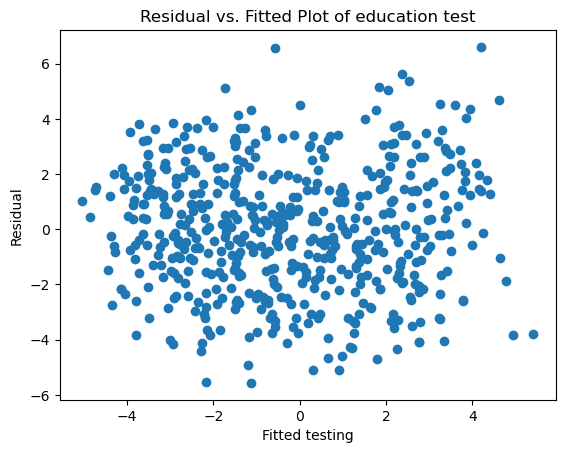

In [17]:
############################ Residual analysis ##############################
# plot
plt.scatter(model_testing.fittedvalues, model_testing.resid)
# adding title and labels
plt.xlabel("Fitted testing")
plt.ylabel("Residual")
plt.title("Residual vs. Fitted Plot of education test")
plt.savefig("residual.png")
plt.show()

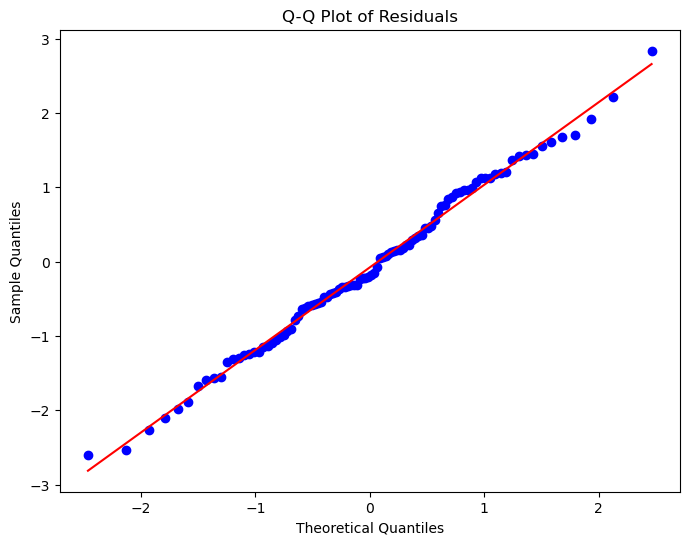

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# 示例数据，替换为你的残差数据
residuals = np.random.normal(0, 1, 100)

# 使用 SciPy 的 probplot 函数生成 Q-Q 图
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=ax)

# 设置标题和标签
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

plt.savefig("QQ.png")
# 显示图形
plt.show()

In [20]:
########################## Adjusted R-squared ###############################
df_predictors_adding_random = df_predictors_selected_VIF
# using a seed to make the result reproducible
np.random.seed(420)
# adding 'totally_random', which is random noise and shows no relationship with the response variable
df_predictors_adding_random["totally_random"] = np.random.normal(
    0, 5, df_predictors_adding_random.shape[0]
)
# the model without windspeed
model_testing_adding_random = sm.OLS(
    endog=testing[["Education Score"]],
    exog=sm.add_constant(df_predictors_adding_random),
).fit()
model_testing_adding_random.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Education Score   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     59.23
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           5.50e-80
Time:                        15:47:40   Log-Likelihood:                -1211.8
No. Observations:                 544   AIC:                             2446.
Df Residuals:                     533   BIC:                             2493.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8228      0.702     -4.019      0.000      -4.203      -1.443
Income Deprivation Percentile                0.0756      0.004     19.413      0.000       0.068       0.083
Knowledge Intensive Financial Services       0.1714      0.144      1.190      0.234      -0.111       0.454
Knowledge Intensive Market Services          0.6355      0.231      2.752      0.006       0.182       1.089
High Technology Services                    -0.1793      0.157     -1.140      0.255      -0.488       0.130
Less Knowledge Intensive Market Services    -0.9349      0.448     -2.087      0.037      -1.815      -0.055
High Technology Manufacturing               -0.0157      0.035     -0.447      0.655      -0.085       0.053
Medium Technology Manufacturing             -0.1047      0.083     -1.258      0.209      -0.268       0.059
Low Technology Manufacturing                -0.1801      0.070     -2.583      0.010      -0.317      -0.043
Non-manufacturing Production                -0.1680      0.076     -2.203      0.028      -0.318      -0.018
totally_random                               0.0032      0.019      0.166      0.868      -0.035       0.041
==============================================================================
Omnibus:                        8.356   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                5.419
Skew:                           0.071   Prob(JB):                       0.0666
Kurtosis:                       2.532   Cond. No.                         467.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
test_rainbow = statsmodels.stats.diagnostic.linear_rainbow()
# This function returns a tuple consisting of two values: the test statistic based on the F test and the pvalue of the test
# Note that these two values are not named. Therefore, you need to know the order before accessing these two values.
print("The p value of the rainbow test: {:.4f}".format(test_rainbow[1]))